In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

pd.set_option("display.max_columns",None)

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.shape

(768, 9)

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# display zero values in int columns
for column in df.columns:
    if df[column].dtypes == 'int64' and (df[column] == 0).sum() != 0:
        print(column,df[column].dtypes ,  (df[column] == 0).sum())
        print(df[column].value_counts(),'\n')

Pregnancies int64 111
Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64 

Glucose int64 5
Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64 

BloodPressure int64 35
BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64 

SkinThickness int64 227
SkinThickness
0     227
32     31


In [11]:
df = df[df['Glucose'] != 0]

In [12]:
df = df[df['BloodPressure'] != 0]

In [13]:
df = df[df['SkinThickness'] != 99] # outlier
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [14]:
df.drop('Insulin',axis=1,inplace=True)

In [15]:
# display zero values in int columns
for column in df.columns:
    if df[column].dtypes == 'int64' and (df[column] == 0).sum() != 0:
        print(column,df[column].dtypes ,  (df[column] == 0).sum())

Pregnancies int64 101
Outcome int64 478


In [16]:
374/728  # in insulin about 51% of data was zero values so we drop the column

0.5137362637362637

In [17]:
df.shape

(727, 8)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 727 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               727 non-null    int64  
 1   Glucose                   727 non-null    int64  
 2   BloodPressure             727 non-null    int64  
 3   SkinThickness             727 non-null    float64
 4   BMI                       727 non-null    float64
 5   DiabetesPedigreeFunction  727 non-null    float64
 6   Age                       727 non-null    int64  
 7   Outcome                   727 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 51.1 KB


In [19]:
df.BMI.value_counts()

BMI
32.0    12
31.2    12
31.6    12
33.3    10
32.4     9
        ..
24.9     1
28.1     1
32.1     1
43.1     1
46.3     1
Name: count, Length: 246, dtype: int64

## Data Visulaization

plt.style.available  # view the ploting styles

plt.style.use('seaborn-v0_8-darkgrid')   # applying the ploting style

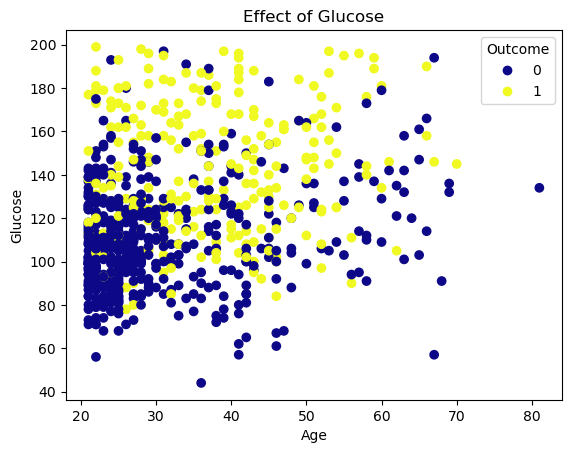

In [20]:
fig , ax = plt.subplots()
scatter = ax.scatter(x=df['Age'],y=df['Glucose'],
                    c=df['Outcome'], cmap='plasma')
ax.set(title="Effect of Glucose",xlabel='Age',ylabel="Glucose")
ax.legend(*scatter.legend_elements(),title='Outcome')
plt.show()

In [21]:
### corelation heatmap
correlation = df.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.138538,0.212596,0.018864,0.016344,-0.032819,0.561819,0.228912
Glucose,0.138538,1.000000,0.224792,0.146864,0.211747,0.134032,0.258065,0.485485
BloodPressure,0.212596,0.224792,1.000000,0.141275,0.257036,-0.004801,0.331079,0.169682
SkinThickness,0.018864,0.146864,0.141275,1.000000,0.553105,0.148302,0.001502,0.180732
BMI,0.016344,0.211747,0.257036,0.553105,1.000000,0.121304,0.002109,0.286521
DiabetesPedigreeFunction,-0.032819,0.134032,-0.004801,0.148302,0.121304,1.000000,0.016213,0.176399
Age,0.561819,0.258065,0.331079,0.001502,0.002109,0.016213,1.000000,0.241827
Outcome,0.228912,0.485485,0.169682,0.180732,0.286521,0.176399,0.241827,1.000000


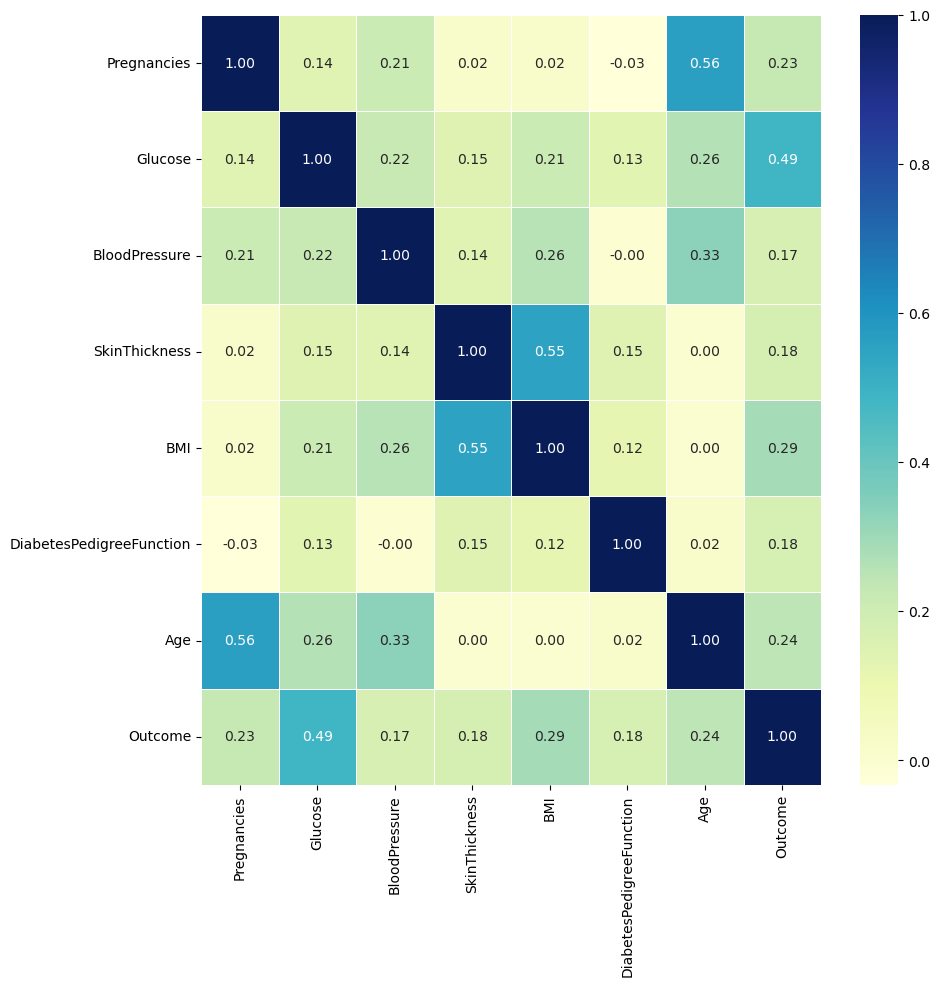

In [22]:
corr_map = df.corr()

fig , ax = plt.subplots(figsize= (10,10))
ax = sns.heatmap(corr_map, annot=True, linewidths= 0.5,fmt= "0.2f",cmap="YlGnBu")
plt.show()

In [23]:
df.shape

(727, 8)

In [24]:
for column in correlation.columns:
    if (correlation[column] <= 0).sum() != 0:
        print(column,(correlation[column] <= 0).sum())

Pregnancies 1
BloodPressure 1
DiabetesPedigreeFunction 2


### Chicking and Removing Outliers

In [25]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

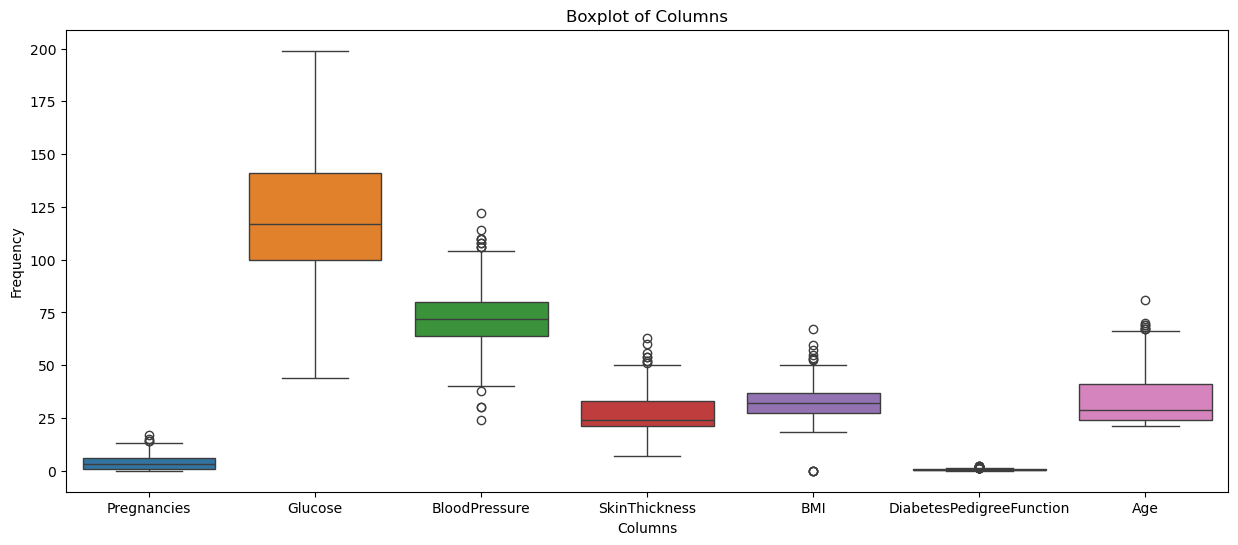

In [26]:
fig , ax = plt.subplots(figsize=(15,6))
sns.boxplot(data=df.loc[:,['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']],ax=ax)
plt.title("Boxplot of Columns")
plt.xlabel("Columns")
plt.ylabel("Frequency")
plt.show()

In [27]:
def removing_outlier(df,columns):
    for col in columns:
        Q3 = df[col].quantile(0.75)
        Q1 = df[col].quantile(0.25)
        IQR = Q3 -Q1
        upper = Q3 + (1.5*IQR)
        lower = Q1 - (1.5*IQR)
        df = df[(df[col]<=upper)& (df[col]>=lower)]
    return df

In [28]:
columns = ['Pregnancies','BloodPressure', 'SkinThickness','BMI', 'DiabetesPedigreeFunction', 'Age']
df_clean= removing_outlier(df,columns)

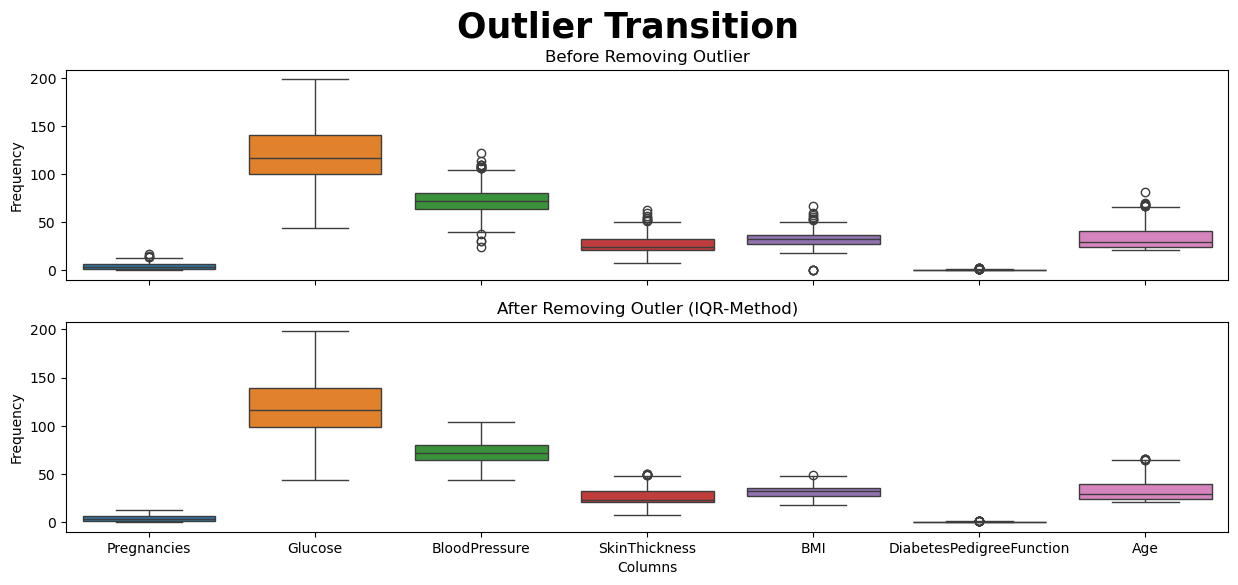

In [29]:
fig ,ax = plt.subplots(nrows=2 ,ncols=1,figsize = (15,6),sharex=True )
fig.suptitle("Outlier Transition",fontsize=25,fontweight='bold')

# Plot 1 Before Removing Outliers
sns.boxplot(data=df.loc[:,['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','BMI', 'DiabetesPedigreeFunction', 'Age']],ax=ax[0])
ax[0].set(title='Before Removing Outlier',ylabel='Frequency')

# Plot 2 After Removing Outliers
sns.boxplot(data=df_clean.loc[:,['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','BMI', 'DiabetesPedigreeFunction', 'Age']],ax=ax[1])
ax[1].set(title='After Removing Outler (IQR-Method)',xlabel="Columns",ylabel="Frequency")

plt.show()

### Discription:
The above figure <b>shows the Outlier Transition Before and After</b> , the <b>Outlier are removed usng IQR-Method</b> and the outlier are minimized

In [30]:
print(f"Shape of df : {df.shape}")
print(f"Shape of df_clean : {df_clean.shape}")
print(f"Number of samples Removed: {df.shape[0]-df_clean.shape[0]}")

Shape of df : (727, 8)
Shape of df_clean : (658, 8)
Number of samples Removed: 69


## Applying Machine learning Model on the data set

In [31]:
X = df_clean.drop("Outcome",axis=1)
Y = df_clean["Outcome"]

X_TRAIN , X_TEST , Y_TRAIN, Y_TEST = train_test_split(X,Y, test_size = 0.25, random_state=30)

print("Size of Train X =  " , len(X_TRAIN))
print("Size of Train Y =  " , len(Y_TRAIN))
print("Size of Test X =  " , len(X_TEST))
print("Size of Test Y =  " , len(Y_TEST))

Size of Train X =   493
Size of Train Y =   493
Size of Test X =   165
Size of Test Y =   165


# <u>LOGISTIC REGRESSION</u>

In [32]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression(solver='liblinear',random_state=10)
lr.fit(X_TRAIN,Y_TRAIN)

LogisticRegression(random_state=10, solver='liblinear')

In [33]:
lr.classes_

array([0, 1], dtype=int64)

In [34]:
lr.intercept_

array([-5.05928808])

In [35]:
lr.coef_

array([[ 0.12503566,  0.03175632, -0.03297146, -0.00117522,  0.05069421,
         0.54612713,  0.01033784]])

## Training

In [36]:
# aaccuracy for prediction on training data 
training_data_prediction = lr.predict(X_TRAIN)
print(training_data_prediction)

[1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 0 0]

In [37]:
from sklearn.metrics import accuracy_score 

accuracy = accuracy_score(Y_TRAIN,training_data_prediction)
print(accuracy)

0.7870182555780934


In [38]:
from sklearn.metrics import classification_report,confusion_matrix 

confusion_matrix(Y_TRAIN,training_data_prediction)

array([[310,  30],
       [ 75,  78]], dtype=int64)

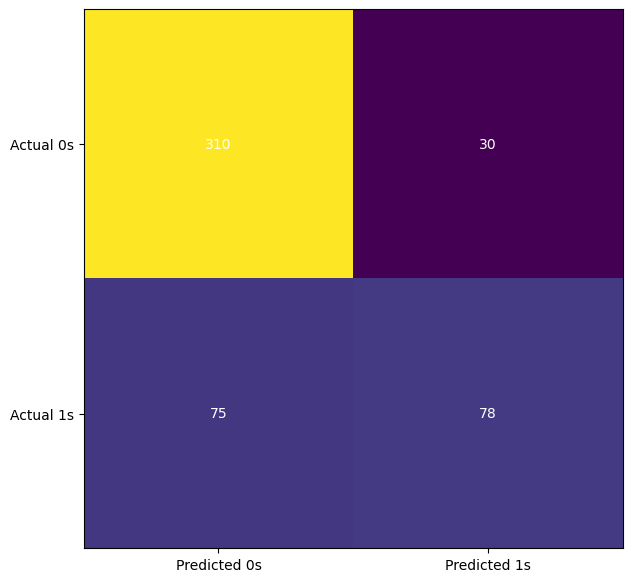

In [39]:
import matplotlib.pyplot as plt 

cm = confusion_matrix(Y_TRAIN,training_data_prediction)

fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
for i in range(2): 
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.show()

In [40]:
report = classification_report(Y_TRAIN,training_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       340
           1       0.72      0.51      0.60       153

    accuracy                           0.79       493
   macro avg       0.76      0.71      0.73       493
weighted avg       0.78      0.79      0.78       493



## Testing

In [41]:
# accuracy for prediction on training data
testing_data_prediction = lr.predict(X_TEST)
print(testing_data_prediction)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [42]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_TEST, testing_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.7151515151515152


In [43]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(Y_TEST, testing_data_prediction)

array([[96,  8],
       [39, 22]], dtype=int64)

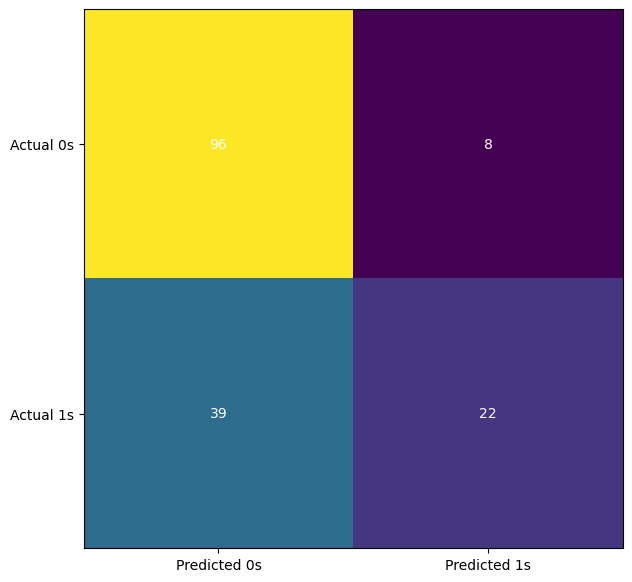

In [44]:
import matplotlib.pyplot as plt 

cm = confusion_matrix(Y_TEST,testing_data_prediction)

fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
for i in range(2): 
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.show()

In [45]:
report = classification_report(Y_TEST,testing_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.92      0.80       104
           1       0.73      0.36      0.48        61

    accuracy                           0.72       165
   macro avg       0.72      0.64      0.64       165
weighted avg       0.72      0.72      0.69       165



# <u>SVM CLASSIFIER</u>

## Training

In [46]:
from sklearn import svm

svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_TRAIN,Y_TRAIN)

SVC(kernel='linear')

In [47]:
# accuracy for prediction on training data
training_data_prediction = svm_clf.predict(X_TRAIN)
print(training_data_prediction)

[1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1
 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 0 0]

In [48]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_TRAIN, training_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.8032454361054767


In [49]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(Y_TRAIN, training_data_prediction)

array([[305,  35],
       [ 62,  91]], dtype=int64)

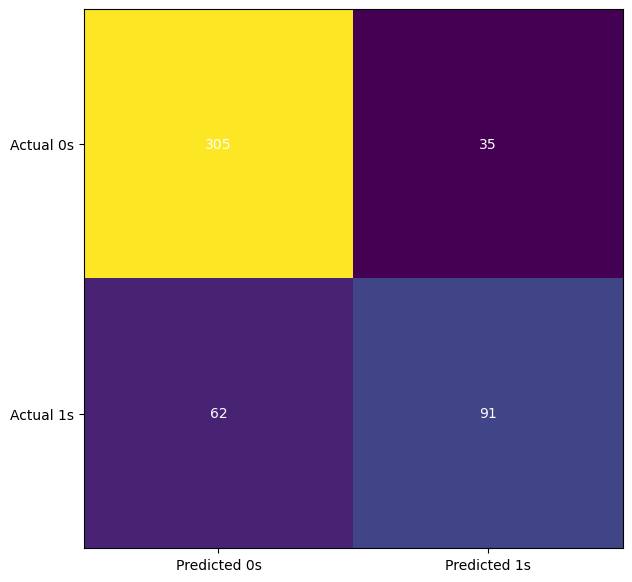

In [50]:
import matplotlib.pyplot as plt 

cm = confusion_matrix(Y_TRAIN,training_data_prediction)

fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
for i in range(2): 
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.show()

In [51]:
report = classification_report(Y_TRAIN,training_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       340
           1       0.72      0.59      0.65       153

    accuracy                           0.80       493
   macro avg       0.78      0.75      0.76       493
weighted avg       0.80      0.80      0.80       493



## Testing

In [52]:
# accuracy for prediction on training data
testing_data_prediction = svm_clf.predict(X_TEST)
print(testing_data_prediction)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [53]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_TEST, testing_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.7212121212121212


In [54]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(Y_TEST, testing_data_prediction)

array([[96,  8],
       [38, 23]], dtype=int64)

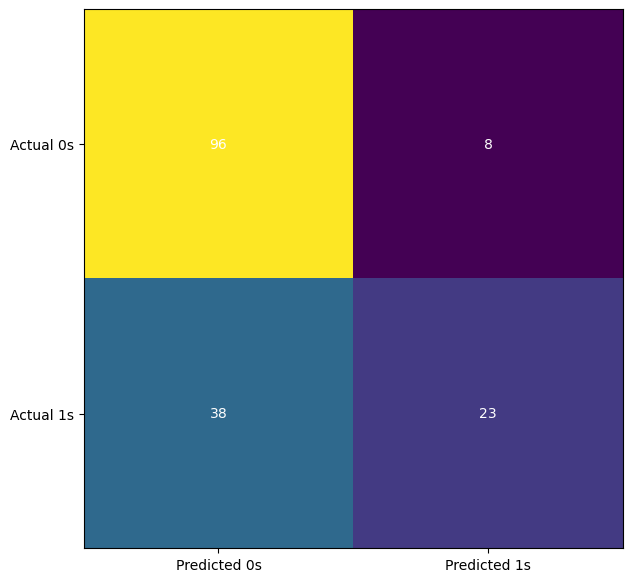

In [55]:
import matplotlib.pyplot as plt 

cm = confusion_matrix(Y_TEST,testing_data_prediction)

fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
for i in range(2): 
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.show()

In [56]:
report = classification_report(Y_TEST,testing_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.72      0.92      0.81       104
           1       0.74      0.38      0.50        61

    accuracy                           0.72       165
   macro avg       0.73      0.65      0.65       165
weighted avg       0.73      0.72      0.69       165



# <u> Random Forest Classifier </u>

# Training

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=7, random_state=15)
# train the classifier
rf_model.fit(X_TRAIN, Y_TRAIN)

RandomForestClassifier(n_estimators=7, random_state=15)

In [58]:
# accuracy for prediction on training data
training_data_prediction = rf_model.predict(X_TRAIN)
training_data_prediction

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [59]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TRAIN, training_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.9776876267748479


In [60]:
confusion_matrix(Y_TRAIN, training_data_prediction)

array([[335,   5],
       [  6, 147]], dtype=int64)

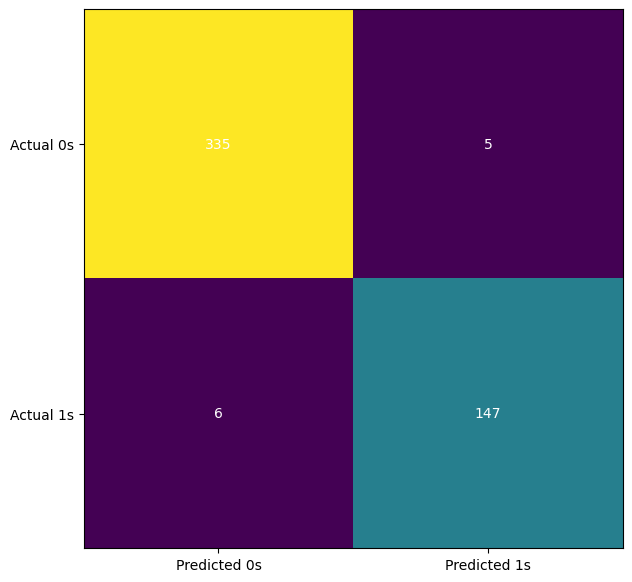

In [61]:
import matplotlib.pyplot as plt 

cm = confusion_matrix(Y_TRAIN,training_data_prediction)

fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
for i in range(2): 
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.show()

In [62]:
report = classification_report(Y_TRAIN,training_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       340
           1       0.97      0.96      0.96       153

    accuracy                           0.98       493
   macro avg       0.97      0.97      0.97       493
weighted avg       0.98      0.98      0.98       493



## Testing

In [63]:
testing_data_prediction = rf_model.predict(X_TEST)
print(testing_data_prediction)

[0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0
 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [64]:
accuracy = accuracy_score(Y_TEST, testing_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.696969696969697


In [65]:
confusion_matrix(Y_TEST, testing_data_prediction)

array([[89, 15],
       [35, 26]], dtype=int64)

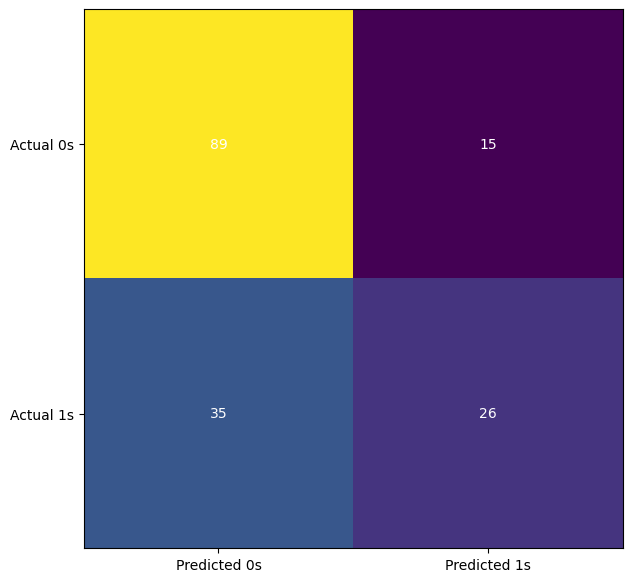

In [66]:
import matplotlib.pyplot as plt 

cm = confusion_matrix(Y_TEST,testing_data_prediction)

fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
for i in range(2): 
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.show()

# Overfit esisted!
# HyperparameterTuning using GridSearchCV

In [84]:
from sklearn.model_selection import GridSearchCV 

# hyperparameter for fine tuning
# chatgpt
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', 0.5],
    'bootstrap': [True]
}

# classifier 
rf_model = RandomForestClassifier(n_estimators=7, random_state=15)

# GridSearchCV 
# CV = Cross Vaidation 
grid = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_TRAIN, Y_TRAIN)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=7, random_state=15),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [3, 5, 7, 10, None],
                         'max_features': ['sqrt', 'log2', 0.5],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [87]:
# Best score and estimator
print("best accuracy", grid.best_score_)
print(grid.best_estimator_)

best accuracy 0.779816513761468
RandomForestClassifier(max_features=0.5, min_samples_split=5, n_estimators=300,
                       random_state=15)


## Training

In [89]:
# accuracy for prediction on training data
training_data_prediction = grid.predict(X_TRAIN)
training_data_prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [90]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_TRAIN, training_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.9889908256880734


In [91]:
confusion_matrix(Y_TRAIN, training_data_prediction)

array([[360,   1],
       [  5, 179]], dtype=int64)

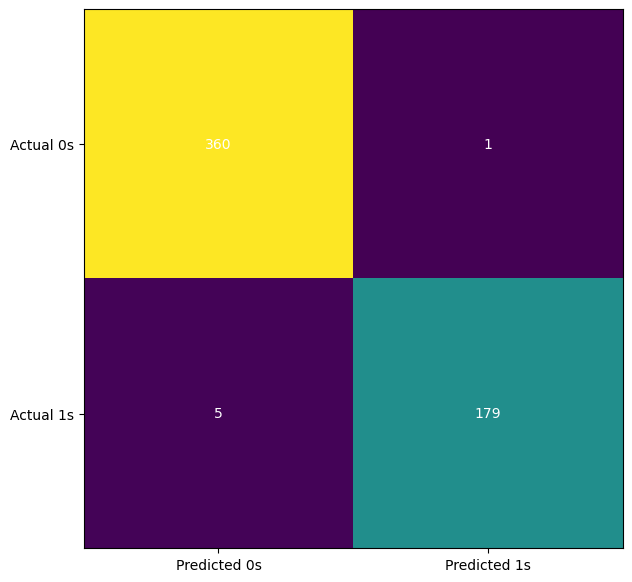

In [92]:
import matplotlib.pyplot as plt 

cm = confusion_matrix(Y_TRAIN,training_data_prediction)

fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
for i in range(2): 
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.show()

In [93]:
report = classification_report(Y_TRAIN, training_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       361
           1       0.99      0.97      0.98       184

    accuracy                           0.99       545
   macro avg       0.99      0.99      0.99       545
weighted avg       0.99      0.99      0.99       545



## Testing

In [94]:
# accuracy for prediction on training data
testing_data_prediction = grid.predict(X_TEST)
print(testing_data_prediction)

[0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1
 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]


In [95]:
accuracy = accuracy_score(Y_TEST, testing_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.7362637362637363


In [96]:
confusion_matrix(Y_TEST, testing_data_prediction)

array([[97, 20],
       [28, 37]], dtype=int64)

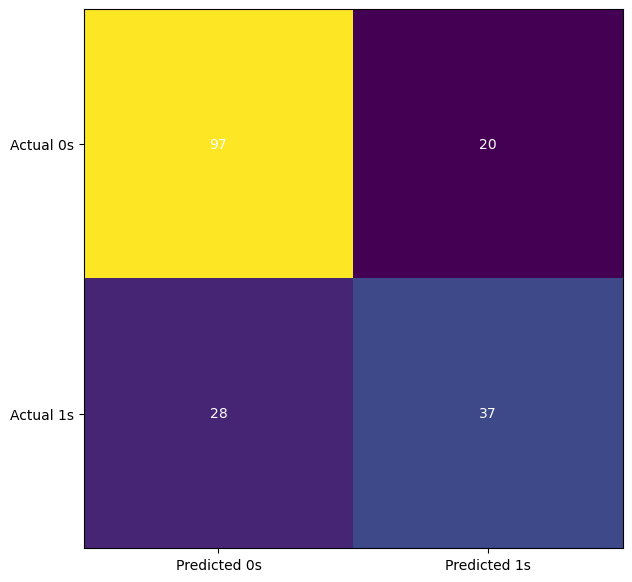

In [97]:
import matplotlib.pyplot as plt 

cm = confusion_matrix(Y_TEST,testing_data_prediction)

fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
for i in range(2): 
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.show()

In [98]:
report = classification_report(Y_TEST,testing_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       117
           1       0.65      0.57      0.61        65

    accuracy                           0.74       182
   macro avg       0.71      0.70      0.70       182
weighted avg       0.73      0.74      0.73       182



<b>The <u>SVM CLASSIFIER</u> Fit / trained better on the data set  hence it is best for this data set</b>